# Support Vector Machine (SVM)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.impute import SimpleImputer

df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')
#df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_18_April (Final Version) New Paper.xlsx')


# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the X DataFrame
X = imputer.fit_transform(X)

# Split the data into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the SVM classifier with specified parameters
svm_classifier = SVC(C=100, kernel='rbf', gamma=1)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = svm_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation set evaluation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Once the model is finalized after validation, evaluate it on the test set
y_test_pred = svm_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test set evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)



Validation Accuracy: 88.44%

Validation Confusion Matrix:
[[14  0  0  0  0  1  6]
 [ 0 77  2  6  1  3  0]
 [ 0  3 47  0  0  0  0]
 [ 0  2  1 39  1  0  0]
 [ 0  3  0  0 65  0  0]
 [ 0  1  0  0  0 27  0]
 [ 0  5  0  1  1  0 14]]

Validation Classification Report:
               precision    recall  f1-score   support

          CRD       1.00      0.67      0.80        21
   Epithermal       0.85      0.87      0.86        89
          MVT       0.94      0.94      0.94        50
Metamorphosed       0.85      0.91      0.88        43
        SEDEX       0.96      0.96      0.96        68
        Skarn       0.87      0.96      0.92        28
         Vein       0.70      0.67      0.68        21

     accuracy                           0.88       320
    macro avg       0.88      0.85      0.86       320
 weighted avg       0.89      0.88      0.88       320

Test Accuracy: 88.12%

Test Confusion Matrix:
[[25  4  0  0  0  0  0]
 [ 0 50  0  7  4  0  0]
 [ 0  5 36  0  1  0  1]
 [ 0  0  0 4

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.impute import SimpleImputer

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the X DataFrame
X = imputer.fit_transform(X)

# Split the data into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC()

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Set up the grid search
grid_cv = GridSearchCV(
    estimator=svm_classifier,
    param_grid=hyperparameter_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Train the classifier on the training data
grid_cv.fit(X_train, y_train)

# Get the best parameters
best_params = grid_cv.best_params_
print(f'Best parameters: {best_params}')

# Make predictions on the validation set using the model with the best parameters
y_val_pred = grid_cv.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation set evaluation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Once the model is finalized after validation, evaluate it on the test set
y_test_pred = grid_cv.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test set evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Validation Accuracy: 88.44%

Validation Confusion Matrix:
[[14  0  0  0  0  1  6]
 [ 0 77  2  6  1  3  0]
 [ 0  3 47  0  0  0  0]
 [ 0  2  1 39  1  0  0]
 [ 0  3  0  0 65  0  0]
 [ 0  1  0  0  0 27  0]
 [ 0  5  0  1  1  0 14]]

Validation Classification Report:
               precision    recall  f1-score   support

          CRD       1.00      0.67      0.80        21
   Epithermal       0.85      0.87      0.86        89
          MVT       0.94      0.94      0.94        50
Metamorphosed       0.85      0.91      0.88        43
        SEDEX       0.96      0.96      0.96        68
        Skarn       0.87      0.96      0.92        28
         Vein       0.70      0.67      0.68        21

     accuracy                           0.88       320
    macro avg       0.88      0.85      0.86       320
 weighted avg       0.89      0.88      0.88       320

Test Accurac

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the X DataFrame
X = imputer.fit_transform(X)

# Split the data into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the SVM classifier with specified parameters
svm_classifier = SVC(C=100, kernel='rbf', gamma=1, probability=True)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = svm_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation set evaluation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Calculate AUC on the validation set
y_val_pred_proba = svm_classifier.predict_proba(X_val)
lb = LabelBinarizer()
lb.fit(y_val)
y_val_lb = lb.transform(y_val)
val_auc = roc_auc_score(y_val_lb, y_val_pred_proba, multi_class='ovr')
print(f'Validation AUC: {val_auc:.4f}')

# Once the model is finalized after validation, evaluate it on the test set
y_test_pred = svm_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test set evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)

# Calculate AUC on the test set
y_test_pred_proba = svm_classifier.predict_proba(X_test)
y_test_lb = lb.transform(y_test)
test_auc = roc_auc_score(y_test_lb, y_test_pred_proba, multi_class='ovr')
print(f'Test AUC: {test_auc:.4f}')

# Output number of original and predicted type counts for validation set
val_original_counts = y_val.value_counts()
val_predicted_counts = pd.Series(y_val_pred).value_counts()
print('\nNumber of Original Type Counts (Validation Set):')
print(val_original_counts)
print('\nNumber of Predicted Type Counts (Validation Set):')
print(val_predicted_counts)

# Output number of original and predicted type counts for test set
test_original_counts = y_test.value_counts()
test_predicted_counts = pd.Series(y_test_pred).value_counts()
print('\nNumber of Original Type Counts (Test Set):')
print(test_original_counts)
print('\nNumber of Predicted Type Counts (Test Set):')
print(test_predicted_counts)

# Calculate precision score
precision = precision_score(y_test, y_test_pred, average='weighted')
print(f'Precision Score: {precision:.4f}')


Validation Accuracy: 88.44%

Validation Confusion Matrix:
[[14  0  0  0  0  1  6]
 [ 0 77  2  6  1  3  0]
 [ 0  3 47  0  0  0  0]
 [ 0  2  1 39  1  0  0]
 [ 0  3  0  0 65  0  0]
 [ 0  1  0  0  0 27  0]
 [ 0  5  0  1  1  0 14]]

Validation Classification Report:
               precision    recall  f1-score   support

          CRD       1.00      0.67      0.80        21
   Epithermal       0.85      0.87      0.86        89
          MVT       0.94      0.94      0.94        50
Metamorphosed       0.85      0.91      0.88        43
        SEDEX       0.96      0.96      0.96        68
        Skarn       0.87      0.96      0.92        28
         Vein       0.70      0.67      0.68        21

     accuracy                           0.88       320
    macro avg       0.88      0.85      0.86       320
 weighted avg       0.89      0.88      0.88       320

Validation AUC: 0.9803
Test Accuracy: 88.12%

Test Confusion Matrix:
[[25  4  0  0  0  0  0]
 [ 0 50  0  7  4  0  0]
 [ 0  5 36  0

In [5]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.impute import SimpleImputer
import numpy as np

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the X DataFrame
X = imputer.fit_transform(X)

# Initialize the SVM classifier with specified parameters
svm_classifier = SVC(C=100, kernel='rbf', gamma=1)

# Initialize KFold cross-validator with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
confusion_matrices = []
classification_reports = []

# Perform cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Train the classifier on the training data
    svm_classifier.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = svm_classifier.predict(X_val)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred, average='weighted')
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    class_report = classification_report(y_val, y_val_pred, output_dict=True)

    # Store metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    confusion_matrices.append(conf_matrix)
    classification_reports.append(class_report)

# Calculate average metrics
avg_accuracy = np.mean(accuracy_list)
avg_precision = np.mean(precision_list)

# Print the average metrics
print(f'Average Validation Accuracy: {avg_accuracy*100:.2f}%')
print(f'Average Validation Precision: {avg_precision:.2f}')
print('\nConfusion Matrices for each fold:')
for i, conf_matrix in enumerate(confusion_matrices):
    print(f'Fold {i+1}:')
    print(conf_matrix)

print('\nClassification Reports for each fold:')
for i, class_report in enumerate(classification_reports):
    print(f'Fold {i+1}:')
    print(class_report)


Average Validation Accuracy: 89.80%
Average Validation Precision: 0.91

Confusion Matrices for each fold:
Fold 1:
[[12  3  0  0  0  0  0]
 [ 0 31  0  1  1  0  0]
 [ 0  5 25  0  0  0  1]
 [ 0  0  0 24  0  0  0]
 [ 0  1  0  0 29  1  0]
 [ 1  1  0  0  0 16  0]
 [ 0  4  0  0  1  0  3]]
Fold 2:
[[11  0  0  0  0  1  2]
 [ 0 34  0  0  0  1  0]
 [ 0  0 18  0  1  0  0]
 [ 0  2  0 18  0  0  0]
 [ 0  4  0  0 40  0  0]
 [ 0  1  0  0  0 15  0]
 [ 0  2  0  0  0  0 10]]
Fold 3:
[[ 7  0  0  0  0  0  3]
 [ 0 35  0  2  0  2  0]
 [ 0  2 21  0  0  0  0]
 [ 0  0  0 19  1  0  0]
 [ 0  0  0  0 43  0  0]
 [ 0  0  0  0  0 18  0]
 [ 0  3  0  1  1  0  2]]
Fold 4:
[[10  0  0  0  0  0  1]
 [ 0 40  0  0  3  0  0]
 [ 0  1 19  0  0  0  0]
 [ 0  0  0 19  0  0  0]
 [ 0  2  0  0 33  0  0]
 [ 0  2  0  0  0 15  0]
 [ 1  4  0  0  0  0 10]]
Fold 5:
[[13  1  0  0  0  1  0]
 [ 1 31  0  0  0  1  1]
 [ 0  6 26  0  1  1  0]
 [ 0  1  0 26  0  0  1]
 [ 0  0  0  0 24  0  0]
 [ 0  0  0  0  0 18  0]
 [ 0  2  0  0  0  0  5]]
Fold 6:
[

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the X DataFrame
X = imputer.fit_transform(X)

# Split the data into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the SVM classifier with specified parameters
svm_classifier = SVC(C=100, kernel='rbf', gamma=1, probability=True)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = svm_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation set evaluation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Compute ROC AUC score for validation set
y_val_proba = svm_classifier.predict_proba(X_val)
y_val_bin = label_binarize(y_val, classes=svm_classifier.classes_)
val_auc = roc_auc_score(y_val_bin, y_val_proba, average='macro')

print(f'Validation AUC: {val_auc:.4f}')

# Once the model is finalized after validation, evaluate it on the test set
y_test_pred = svm_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test set evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)

# Compute ROC AUC score for test set
y_test_proba = svm_classifier.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=svm_classifier.classes_)
test_auc = roc_auc_score(y_test_bin, y_test_proba, average='macro')

print(f'Test AUC: {test_auc:.4f}')


Validation Accuracy: 88.44%

Validation Confusion Matrix:
[[14  0  0  0  0  1  6]
 [ 0 77  2  6  1  3  0]
 [ 0  3 47  0  0  0  0]
 [ 0  2  1 39  1  0  0]
 [ 0  3  0  0 65  0  0]
 [ 0  1  0  0  0 27  0]
 [ 0  5  0  1  1  0 14]]

Validation Classification Report:
               precision    recall  f1-score   support

          CRD       1.00      0.67      0.80        21
   Epithermal       0.85      0.87      0.86        89
          MVT       0.94      0.94      0.94        50
Metamorphosed       0.85      0.91      0.88        43
        SEDEX       0.96      0.96      0.96        68
        Skarn       0.87      0.96      0.92        28
         Vein       0.70      0.67      0.68        21

     accuracy                           0.88       320
    macro avg       0.88      0.85      0.86       320
 weighted avg       0.89      0.88      0.88       320

Validation AUC: 0.9805
Test Accuracy: 88.12%

Test Confusion Matrix:
[[25  4  0  0  0  0  0]
 [ 0 50  0  7  4  0  0]
 [ 0  5 36  0

Validation Accuracy: 88.44%

Validation Confusion Matrix:
[[14  0  0  0  0  1  6]
 [ 0 77  2  6  1  3  0]
 [ 0  3 47  0  0  0  0]
 [ 0  2  1 39  1  0  0]
 [ 0  3  0  0 65  0  0]
 [ 0  1  0  0  0 27  0]
 [ 0  5  0  1  1  0 14]]

Validation Classification Report:
               precision    recall  f1-score   support

          CRD       1.00      0.67      0.80        21
   Epithermal       0.85      0.87      0.86        89
          MVT       0.94      0.94      0.94        50
Metamorphosed       0.85      0.91      0.88        43
        SEDEX       0.96      0.96      0.96        68
        Skarn       0.87      0.96      0.92        28
         Vein       0.70      0.67      0.68        21

     accuracy                           0.88       320
    macro avg       0.88      0.85      0.86       320
 weighted avg       0.89      0.88      0.88       320



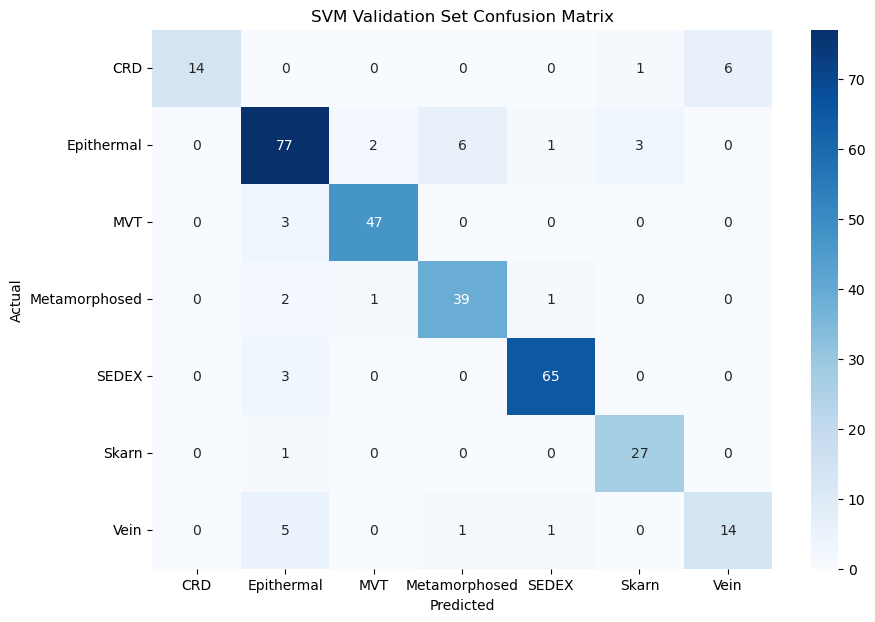

Test Accuracy: 88.12%

Test Confusion Matrix:
[[25  4  0  0  0  0  0]
 [ 0 50  0  7  4  0  0]
 [ 0  5 36  0  1  0  1]
 [ 0  0  0 40  0  0  0]
 [ 0  2  0  0 82  0  1]
 [ 1  3  0  0  0 37  0]
 [ 0  8  0  0  1  0 12]]

Test Classification Report:
               precision    recall  f1-score   support

          CRD       0.96      0.86      0.91        29
   Epithermal       0.69      0.82      0.75        61
          MVT       1.00      0.84      0.91        43
Metamorphosed       0.85      1.00      0.92        40
        SEDEX       0.93      0.96      0.95        85
        Skarn       1.00      0.90      0.95        41
         Vein       0.86      0.57      0.69        21

     accuracy                           0.88       320
    macro avg       0.90      0.85      0.87       320
 weighted avg       0.89      0.88      0.88       320



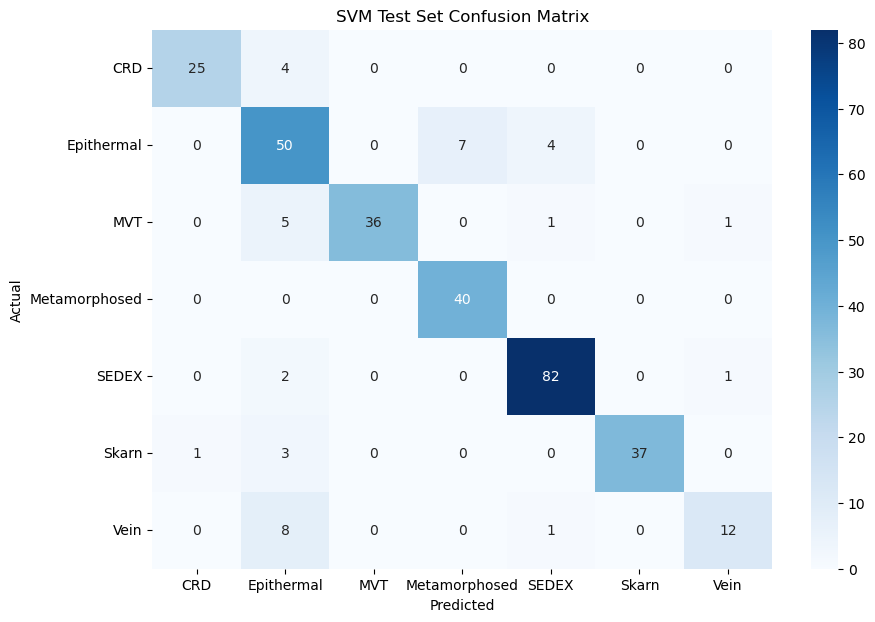

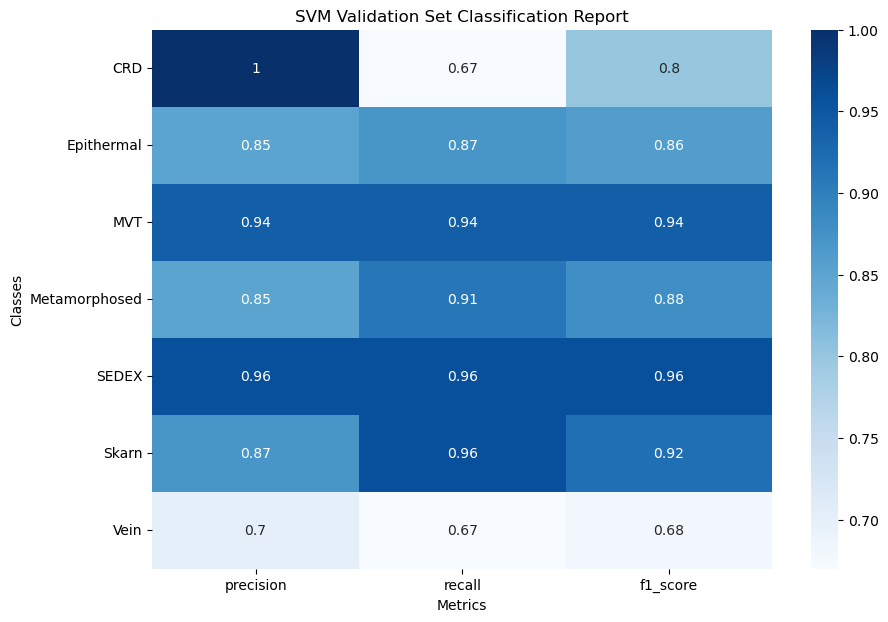

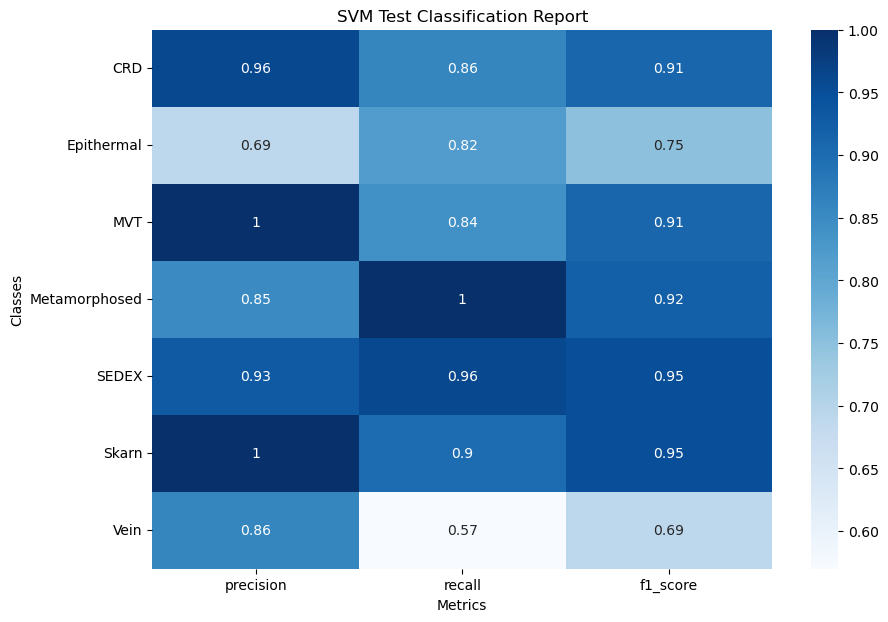

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')
# df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_18_April (Final Version) New Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the X DataFrame
X = imputer.fit_transform(X)

# Split the data into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the SVM classifier with specified parameters
svm_classifier = SVC(C=100, kernel='rbf', gamma=1)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = svm_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation set evaluation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Plot confusion matrix heatmap for validation set and save it
plt.figure(figsize=(10, 7))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Validation Set Confusion Matrix')
plt.savefig('/home/alifian/Galena Results/SVMvc.png', dpi=1000)
plt.show()

# Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test set evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)

# Plot confusion matrix heatmap for test set and save it
plt.figure(figsize=(10, 7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Test Set Confusion Matrix')
plt.savefig('/home/alifian/Galena Results/SVMtc.png', dpi=1000)
plt.show()

def classification_report_to_dataframe(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row_data = line.split()
        if len(row_data) == 5:  # Check if the row has the correct number of columns
            row = {'class': row_data[0], 
                   'precision': float(row_data[1]), 
                   'recall': float(row_data[2]), 
                   'f1_score': float(row_data[3]), 
                   'support': int(row_data[4])}
            report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    return dataframe

val_classification_df = classification_report_to_dataframe(val_classification_rep)
test_classification_df = classification_report_to_dataframe(test_classification_rep)

# Plot classification report heatmap for validation set and save it
plt.figure(figsize=(10, 7))
sns.heatmap(val_classification_df.set_index('class').iloc[:, :-1], annot=True, cmap='Blues')
plt.title('SVM Validation Set Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.savefig('/home/alifian/Galena Results/SVMvr.png', dpi=1000)
plt.show()

# Plot classification report heatmap for test set and save it
plt.figure(figsize=(10, 7))
sns.heatmap(test_classification_df.set_index('class').iloc[:, :-1], annot=True, cmap='Blues')
plt.title('SVM Test Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.savefig('/home/alifian/Galena Results/SVMtr.png', dpi=1000)
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(C=100, kernel='rbf', gamma=1, probability=True)

# Function to evaluate model on validation and test sets
def evaluate_model(X_train, y_train, X_val, y_val, X_test, y_test, technique_name):
    svm_classifier.fit(X_train, y_train)
    
    # Validation set predictions and evaluation
    y_val_pred = svm_classifier.predict(X_val)
    y_val_proba = svm_classifier.predict_proba(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_conf_matrix = confusion_matrix(y_val, y_val_pred)
    val_classification_rep = classification_report(y_val, y_val_pred)
    y_val_bin = label_binarize(y_val, classes=svm_classifier.classes_)
    val_auc = roc_auc_score(y_val_bin, y_val_proba, average='macro')
    
    print(f'\nResults after applying {technique_name} on Validation Set:')
    print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
    print('Validation AUC: {:.4f}'.format(val_auc))
    print('Validation Confusion Matrix:\n', val_conf_matrix)
    print('Validation Classification Report:\n', val_classification_rep)
    
    # Test set predictions and evaluation
    y_test_pred = svm_classifier.predict(X_test)
    y_test_proba = svm_classifier.predict_proba(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_classification_rep = classification_report(y_test, y_test_pred)
    y_test_bin = label_binarize(y_test, classes=svm_classifier.classes_)
    test_auc = roc_auc_score(y_test_bin, y_test_proba, average='macro')
    
    print(f'\nResults after applying {technique_name} on Test Set:')
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')
    print('Test AUC: {:.4f}'.format(test_auc))
    print('Test Confusion Matrix:\n', test_conf_matrix)
    print('Test Classification Report:\n', test_classification_rep)
    print('--------------------------------------------------------')

# 1. Apply SMOTE and evaluate
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
evaluate_model(X_train_smote, y_train_smote, X_val, y_val, X_test, y_test, 'SMOTE')

# 2. Apply RUC (Random Under-Sampling) and evaluate
ruc = RandomUnderSampler(random_state=42)
X_train_ruc, y_train_ruc = ruc.fit_resample(X_train, y_train)
evaluate_model(X_train_ruc, y_train_ruc, X_val, y_val, X_test, y_test, 'Random Under-Sampling (RUC)')

# 3. Evaluate original (no resampling)
evaluate_model(X_train, y_train, X_val, y_val, X_test, y_test, 'Original (No Resampling)')



Results after applying SMOTE on Validation Set:
Validation Accuracy: 87.19%
Validation AUC: 0.9800
Validation Confusion Matrix:
 [[13  0  0  0  0  1  7]
 [ 0 70  2  8  1  3  5]
 [ 0  2 48  0  0  0  0]
 [ 0  1  1 40  1  0  0]
 [ 0  3  0  0 65  0  0]
 [ 0  1  0  0  0 27  0]
 [ 0  4  0  1  0  0 16]]
Validation Classification Report:
                precision    recall  f1-score   support

          CRD       1.00      0.62      0.76        21
   Epithermal       0.86      0.79      0.82        89
          MVT       0.94      0.96      0.95        50
Metamorphosed       0.82      0.93      0.87        43
        SEDEX       0.97      0.96      0.96        68
        Skarn       0.87      0.96      0.92        28
         Vein       0.57      0.76      0.65        21

     accuracy                           0.87       320
    macro avg       0.86      0.85      0.85       320
 weighted avg       0.88      0.87      0.87       320


Results after applying SMOTE on Test Set:
Test Accuracy: 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Initialize the SVM classifier
svm_classifier = SVC(C=100, kernel='rbf', gamma=1, probability=True, random_state=42)

# Function to evaluate model using 10-fold cross-validation
def evaluate_model_kfold(X, y, technique_name):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    val_accuracies = []
    val_aucs = []
    test_accuracies = []
    test_aucs = []
    
    fold = 1
    for train_index, test_index in skf.split(X, y):
        X_train, X_val_test = X[train_index], X[test_index]
        y_train, y_val_test = y[train_index], y[test_index]
        
        # Further split into validation and test sets
        X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)
        
        # Train the model
        svm_classifier.fit(X_train, y_train)
        
        # Validation set predictions and evaluation
        y_val_pred = svm_classifier.predict(X_val)
        y_val_proba = svm_classifier.predict_proba(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        y_val_bin = label_binarize(y_val, classes=svm_classifier.classes_)
        val_auc = roc_auc_score(y_val_bin, y_val_proba, average='macro')
        
        val_accuracies.append(val_accuracy)
        val_aucs.append(val_auc)
        
        # Test set predictions and evaluation
        y_test_pred = svm_classifier.predict(X_test)
        y_test_proba = svm_classifier.predict_proba(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        y_test_bin = label_binarize(y_test, classes=svm_classifier.classes_)
        test_auc = roc_auc_score(y_test_bin, y_test_proba, average='macro')
        
        test_accuracies.append(test_accuracy)
        test_aucs.append(test_auc)
        
        print(f'\nFold {fold} Results after applying {technique_name}:')
        print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
        print('Validation AUC: {:.4f}'.format(val_auc))
        print('Test Accuracy: {:.2f}%'.format(test_accuracy*100))
        print('Test AUC: {:.4f}'.format(test_auc))
        print('--------------------------------------------------------')
        fold += 1
    
    print(f'\nAverage Results after applying {technique_name} across 10 folds:')
    print(f'Average Validation Accuracy: {np.mean(val_accuracies)*100:.2f}%')
    print(f'Average Validation AUC: {np.mean(val_aucs):.4f}')
    print(f'Average Test Accuracy: {np.mean(test_accuracies)*100:.2f}%')
    print(f'Average Test AUC: {np.mean(test_aucs):.4f}')
    print('============================================================')

# 1. Apply SMOTE and evaluate
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
evaluate_model_kfold(X_smote, y_smote, 'SMOTE')

# 2. Apply RUC (Random Under-Sampling) and evaluate
ruc = RandomUnderSampler(random_state=42)
X_ruc, y_ruc = ruc.fit_resample(X, y)
evaluate_model_kfold(X_ruc, y_ruc, 'Random Under-Sampling (RUC)')

# 3. Evaluate original (no resampling)
evaluate_model_kfold(X, y, 'Original (No Resampling)')



Fold 1 Results after applying SMOTE:
Validation Accuracy: 94.49%
Validation AUC: 0.9959
Test Accuracy: 91.34%
Test AUC: 0.9911
--------------------------------------------------------

Fold 2 Results after applying SMOTE:
Validation Accuracy: 93.70%
Validation AUC: 0.9908
Test Accuracy: 96.06%
Test AUC: 0.9968
--------------------------------------------------------

Fold 3 Results after applying SMOTE:
Validation Accuracy: 94.49%
Validation AUC: 0.9964
Test Accuracy: 94.49%
Test AUC: 0.9953
--------------------------------------------------------

Fold 4 Results after applying SMOTE:
Validation Accuracy: 90.55%
Validation AUC: 0.9736
Test Accuracy: 95.28%
Test AUC: 0.9948
--------------------------------------------------------

Fold 5 Results after applying SMOTE:
Validation Accuracy: 96.83%
Validation AUC: 0.9971
Test Accuracy: 93.70%
Test AUC: 0.9941
--------------------------------------------------------

Fold 6 Results after applying SMOTE:
Validation Accuracy: 99.21%
Validatio